<a href="https://colab.research.google.com/github/Blab2023/Clean-Air-Fund-2023-School/blob/main/Workshop_18_%7C_Climate_Data_Formats_(EN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Working with NetCDF Files**

When researching scientific data and especially climate data, you will very likely come accross `NetCDF` and similar files.

A NetCDF (Network Common Data Format) file is a format designed to store **multi-dimensional** scientific data.

It is a **self-describing file**.

![NetCDF Diagram](https://web.itu.edu.tr/~tokerem/Presentation/netcdf_1.png)

### **Using xarray with NetCDF files**
Pandas is not suitable for loading NetCDF files and we'll need to use another library instead.

[xarray](https://docs.xarray.dev/en/stable/index.html) has many similarities to Pandas and is also built on top of Numpy.

Download the [example NetCDF file](https://www.unidata.ucar.edu/software/netcdf/examples/ECMWF_ERA-40_subset.nc)

> NOTE: NetCDF files can be big! Very big!

In [ ]:
import xarray as xr

It is common to load data in xarray into a variable called `ds`

In [ ]:
ds = xr.open_dataset('ECMWF_ERA-40_subset.nc')
ds

In [ ]:
ds.data_vars

In [ ]:
ds['tcw'].attrs.get('long_name')

We can get a list of variables and their long names by looping through it. This is a bit of Python code:

> This reads as: For every "var" in ds.data_vars, get the long name attribute of that var and then print the var and its long name.

In [ ]:
for var in ds.data_vars:
    long_name = ds[var].attrs.get('long_name')
    print(var + ': ' + long_name)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tcw = ds['tcw']
tcw.plot()
plt.show()

In [ ]:
ds.dims

In [ ]:
ds['latitude'].values

In [ ]:
ds['longitude'].values

In [ ]:
selected_data = ds['tp'].sel(latitude=62.5, longitude=27.5)
selected_data.values

In [ ]:
selected_data = selected_data.fillna(0)

In [ ]:
tp = selected_data
tp.plot()
plt.show()

## **Converting to a Pandas dataframe**

We can convert multidimensional xarray datasets to 2-dimensional Pandas dataframes.

> Beware that these dataframes can become huge!

In [ ]:
df = selected_data.to_dataframe()
df

In [ ]:
df.reset_index(inplace=True)
df

In [ ]:
df.to_csv('selected_data.csv', index=False)

# **Working with GeoTIFF files**

GeoTIFF files are raster image files that contain georeferencing information, allowing them to map spatial data to specific locations on Earth's surface.

> A raster is a grid of pixels. Each cell holds a value representing things like temperature or color etc.

Download and example `tiff` file [here](https://github.com/mommermi/geotiff_sample/blob/master/sample.tif).


## **Installing rasterio**

`rasterio` is a library we can use to work with geoTIFF files.

> Colab comes prebundled with many libraries, but we can install any number of additional libraries with `pip`

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 125.4 MB/s eta 0:00:00


In [ ]:
import rasterio

tiff_ds = rasterio.open('sample.tif')

Read more about CRS [here](https://docs.qgis.org/3.34/en/docs/gentle_gis_introduction/coordinate_reference_systems.html)

In [ ]:
# Number of bands
print(tiff_ds.count)

# Band descriptions
print(tiff_ds.descriptions)

# Band data types
print(tiff_ds.dtypes)

# Dimensions
print(tiff_ds.width)
print(tiff_ds.height)

# Coordinate reference system
print(tiff_ds.crs)

3
(None, None, None)
('uint16', 'uint16', 'uint16')
1001
1001
EPSG:32631


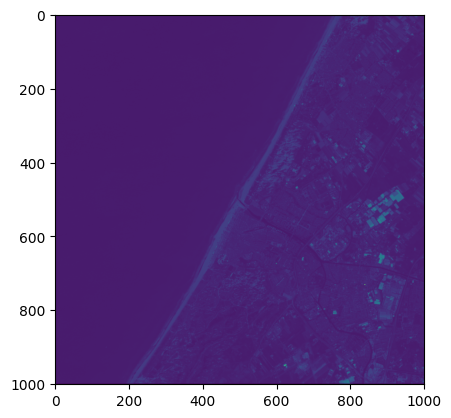

In [ ]:
from rasterio.plot import show
import matplotlib.pyplot as plt

band1 = tiff_ds.read(1)
plt.imshow(band1)
plt.show()

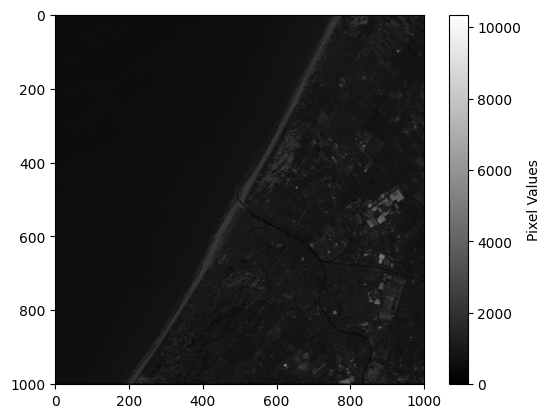

In [ ]:
band2 = tiff_ds.read(2)
plt.imshow(band2,cmap='gray')
plt.colorbar(label='Pixel Values')
plt.show()

In [ ]:
band1

array([[   0,  799,  788, ..., 1061, 1433, 2430],
       [   0,  774,  792, ..., 1027, 1125, 1733],
       [   0,  797,  801, ..., 1046, 1040, 1100],
       ...,
       [   0,  826,  837, ..., 1562, 1489, 1740],
       [   0,  804,  825, ..., 1553, 1582, 1619],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16)

In [ ]:
row, col = 100, 200
lon, lat = tiff_ds.xy(row, col)
print(f"Coordinates at pixel {row}, {col}: {lon}, {lat}")

Coordinates at pixel 100, 200: 592525.0, 5789625.0


In [ ]:
from rasterio.windows import Window

window = Window(100, 200, 50, 50)
region_data = tiff_ds.read(1, window=window)

region_data

array([[853, 840, 822, ..., 813, 819, 800],
       [832, 834, 828, ..., 812, 797, 815],
       [804, 814, 803, ..., 811, 826, 845],
       ...,
       [803, 804, 828, ..., 823, 810, 827],
       [819, 820, 816, ..., 807, 807, 821],
       [820, 822, 808, ..., 822, 812, 825]], dtype=uint16)

In [ ]:
import pandas as pd
df = pd.DataFrame(region_data)
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,853,840,822,808,813,808,827,799,790,793,...,817,821,820,811,816,827,815,813,819,800
1,832,834,828,817,810,799,803,808,812,793,...,795,796,790,808,814,796,802,812,797,815
2,804,814,803,814,824,824,825,806,802,804,...,817,812,794,807,825,814,802,811,826,845
3,819,810,802,827,817,827,822,799,818,819,...,837,820,811,818,806,820,834,815,832,836
4,851,829,812,817,822,822,811,815,813,818,...,839,818,810,813,814,829,835,804,806,826
5,842,831,809,816,816,815,818,817,812,811,...,815,811,812,836,837,823,814,822,819,809
6,815,812,800,797,803,807,806,790,793,801,...,800,803,803,808,820,810,789,799,804,795
7,795,806,816,815,820,813,810,814,803,814,...,806,801,799,809,798,813,794,806,817,826
8,811,819,806,797,815,824,816,823,834,839,...,815,801,813,831,816,837,843,834,807,826
9,819,827,816,801,807,822,807,811,813,804,...,822,808,818,836,824,817,827,819,827,813


# **Geocoding and Reverse geocoding**

**Geocoding** is the process of turning a place name, like "Cape Town," into geographic coordinates like latitude and longitude. It allows us to link location-based information to maps, climate data, and satellite imagery.

**Reverse geocoding** does the opposite: it takes a coordinate and tells you the nearest place name, like finding out that `-33.92, 18.42` points to Cape Town.

Both are essential for working with spatial data in a structured way.



## Batch Processing with Nominatim

[Nominatim](https://nominatim.org/) is a free tool to search locations and find coordinates.


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time

def geocode_or_reverse(df, mode='geocode', address_column='address', lat_column='latitude', lon_column='longitude'):
    geolocator = Nominatim(user_agent="polite_nominatim_geocoder", timeout=10)
    if mode == 'geocode':
        geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)
        df['latitude'] = None
        df['longitude'] = None
        for index, row in df.iterrows():
            try:
                location = geocode(row[address_column])
                if location:
                    df.at[index, 'latitude'] = location.latitude
                    df.at[index, 'longitude'] = location.longitude
            except Exception as e:
                print(f"Geocoding error: {e}")
                time.sleep(1)
    elif mode == 'reverse':
        reverse = RateLimiter(geolocator.reverse, min_delay_seconds=2)
        df['address_from_coords'] = None
        for index, row in df.iterrows():
            try:
                if pd.notnull(row[lat_column]) and pd.notnull(row[lon_column]):
                    location = reverse((row[lat_column], row[lon_column]))
                    if location:
                        df.at[index, 'address_from_coords'] = location.address
            except Exception as e:
                print(f"Reverse geocoding error: {e}")
                time.sleep(1)
    else:
        print("Invalid mode. Choose 'geocode' or 'reverse'.")
    return df

In [ ]:
df = pd.read_csv('addresses.csv')
df

,address
0,"1600 Amphitheatre Parkway, Mountain View, CA 9..."
1,"221B Baker Street, London NW1 6XE"
2,"350 Fifth Avenue, New York, NY 10118"
3,"1 Infinite Loop, Cupertino, CA 95014"
4,"4059 Mt Lee Dr, Los Angeles, CA 90068"
5,"Piazza del Colosseo, 1, 00184 Roma RM, Italy"
6,"4 Privet Drive, Little Whinging, Surrey"
7,"11 Wall Street, New York, NY 10005"
8,"Champ de Mars, 5 Av. Anatole France, 75007 Par..."
9,"Red Square, Moscow, Russia, 109012"


In [ ]:
geocode_or_reverse(df, 'reverse')

,address,latitude,longitude,address_from_coords
0,"1600 Amphitheatre Parkway, Mountain View, CA 9...",37.422486,-122.085585,"Google Building 41, 1600, Amphitheatre Parkway..."
1,"221B Baker Street, London NW1 6XE",51.523388,-0.158237,"221B Baker Street, Baker Street, Marylebone, L..."
2,"350 Fifth Avenue, New York, NY 10118",40.916102,-73.807181,"330, 5th Avenue, North Pelham, Village of Pelh..."
3,"1 Infinite Loop, Cupertino, CA 95014",37.33167,-122.030098,"Infinite Loop 1, 1, Infinite Loop, Apple Campu..."
4,"4059 Mt Lee Dr, Los Angeles, CA 90068",34.133791,-118.314873,"3833, Mount Lee Drive, Los Feliz Neighborhood ..."
5,"Piazza del Colosseo, 1, 00184 Roma RM, Italy",41.891637,12.492756,"1, Piazza del Colosseo, Monti, Municipio Roma ..."
6,"4 Privet Drive, Little Whinging, Surrey",None,None,None
7,"11 Wall Street, New York, NY 10005",40.707065,-74.011176,"New York Stock Exchange, 11, Wall Street, Fina..."
8,"Champ de Mars, 5 Av. Anatole France, 75007 Par...",None,None,None
9,"Red Square, Moscow, Russia, 109012",None,None,None


# EO Data with Google Earth Engine

In [ ]:
!pip install imageio
!pip install earthengine-api folium

In [ ]:
import ee
import datetime
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import imageio

# Authenticate and Initialize
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize(project="openup-ee")

In [ ]:
# === FUNCTION ===
def fetch_and_display_images(lat, lon, start_date, end_date, dataset='COPERNICUS/S2_SR_HARMONIZED', area_km=5, filmstrip=True, make_gif=False):
    # AREA
    point = ee.Geometry.Point(lon, lat)
    aoi = point.buffer(area_km * 1000).bounds()

    # COLLECTION
    collection = (
        ee.ImageCollection(dataset)
        .filterDate(start_date, end_date)
        .filterBounds(aoi)
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))
        .map(lambda image: image.addBands(image.normalizedDifference(['B8', 'B12']).rename('NBR')))
    )

    count = collection.size().getInfo()
    print(f'Found {count} images between {start_date} and {end_date}')

    if count == 0:
        print("No images found, try different dates or location.")
        return

    images = collection.sort('system:time_start', False).toList(count)

    rgb_images = []
    nbr_images = []
    titles = []

    for i in range(count):
        img = ee.Image(images.get(i))
        timestamp = ee.Date(img.get('system:time_start')).format('YYYY-MM-dd').getInfo()

        # Thumbnails - Bigger size now
        rgb_thumb = img.select(['B4', 'B3', 'B2']).getThumbURL({
            'min': 0, 'max': 3000,
            'dimensions': 1024,
            'region': aoi
        })
        nbr_thumb = img.select('NBR').getThumbURL({
            'min': -1, 'max': 1,
            'dimensions': 1024,
            'palette': ['white', 'green', 'black'],
            'region': aoi
        })

        # Download thumbnails
        def fetch(url):
            response = requests.get(url)
            return Image.open(BytesIO(response.content))

        rgb_images.append(fetch(rgb_thumb))
        nbr_images.append(fetch(nbr_thumb))
        titles.append(timestamp)

    # === DISPLAY ===
    if filmstrip:
        fig, axes = plt.subplots(1, count, figsize=(count * 6, 6))
        if count == 1:
            axes = [axes]
        for ax, img, title in zip(axes, rgb_images, titles):
            ax.imshow(img)
            ax.set_title(title, fontsize=12)
            ax.axis('off')
        plt.suptitle('Sentinel-2 RGB Images', fontsize=20)
        plt.show()

        fig, axes = plt.subplots(1, count, figsize=(count * 6, 6))
        if count == 1:
            axes = [axes]
        for ax, img, title in zip(axes, nbr_images, titles):
            ax.imshow(img)
            ax.set_title(title, fontsize=12)
            ax.axis('off')
        plt.suptitle('Sentinel-2 NBR Images', fontsize=20)
        plt.show()
    else:
        for img, title in zip(rgb_images, titles):
            plt.figure(figsize=(8,8))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{title} - RGB', fontsize=16)
            plt.show()

        for img, title in zip(nbr_images, titles):
            plt.figure(figsize=(8,8))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{title} - NBR', fontsize=16)
            plt.show()

    # === MAKE GIF ===
    if make_gif:
        gif_path = '/tmp/sentinel_timelapse.gif'
        frames = [img.copy().resize((512,512)) for img in rgb_images]  # Resize to avoid huge GIFs
        imageio.mimsave(gif_path, frames, duration=0.8)  # 0.8s per frame

        print(f"GIF saved at: {gif_path}")

        # Display in notebook
        from IPython.display import Image as IPImage
        from IPython.display import display

        display(IPImage(filename=gif_path))

Found 4 images between 2025-04-10 and 2025-04-28


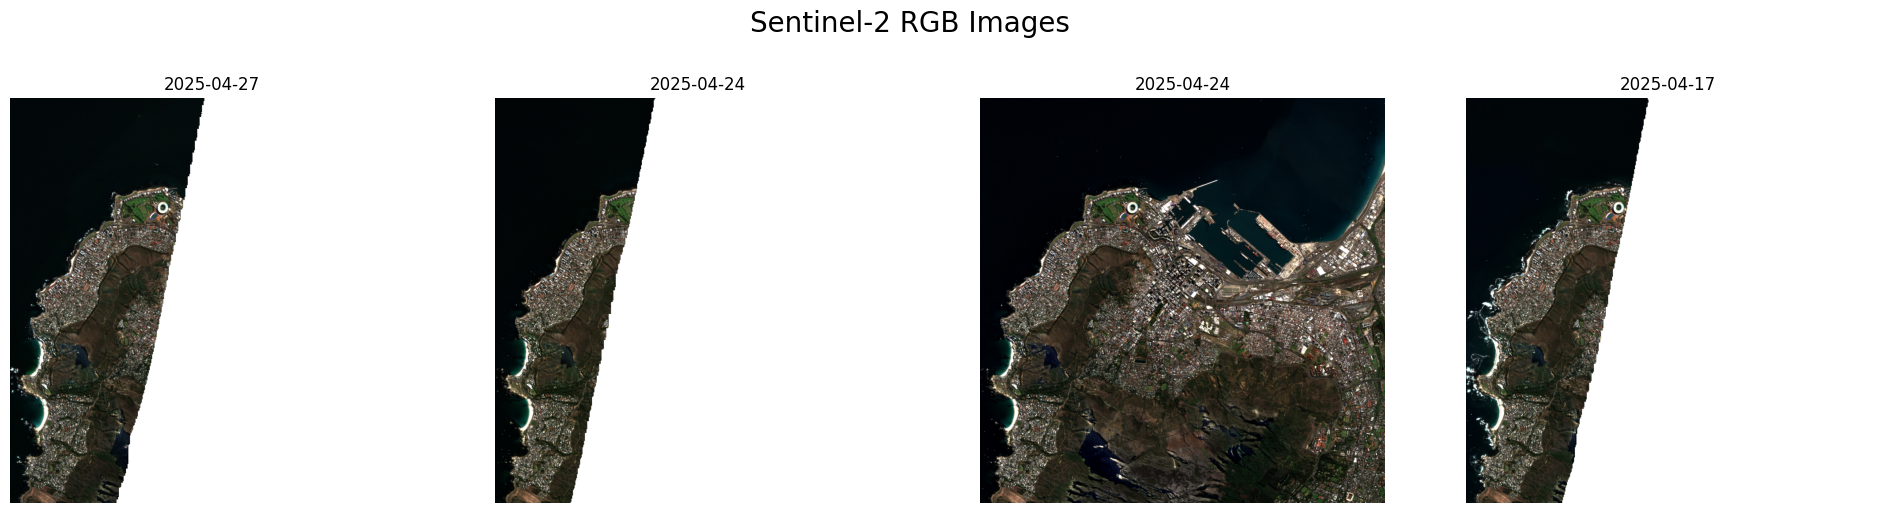

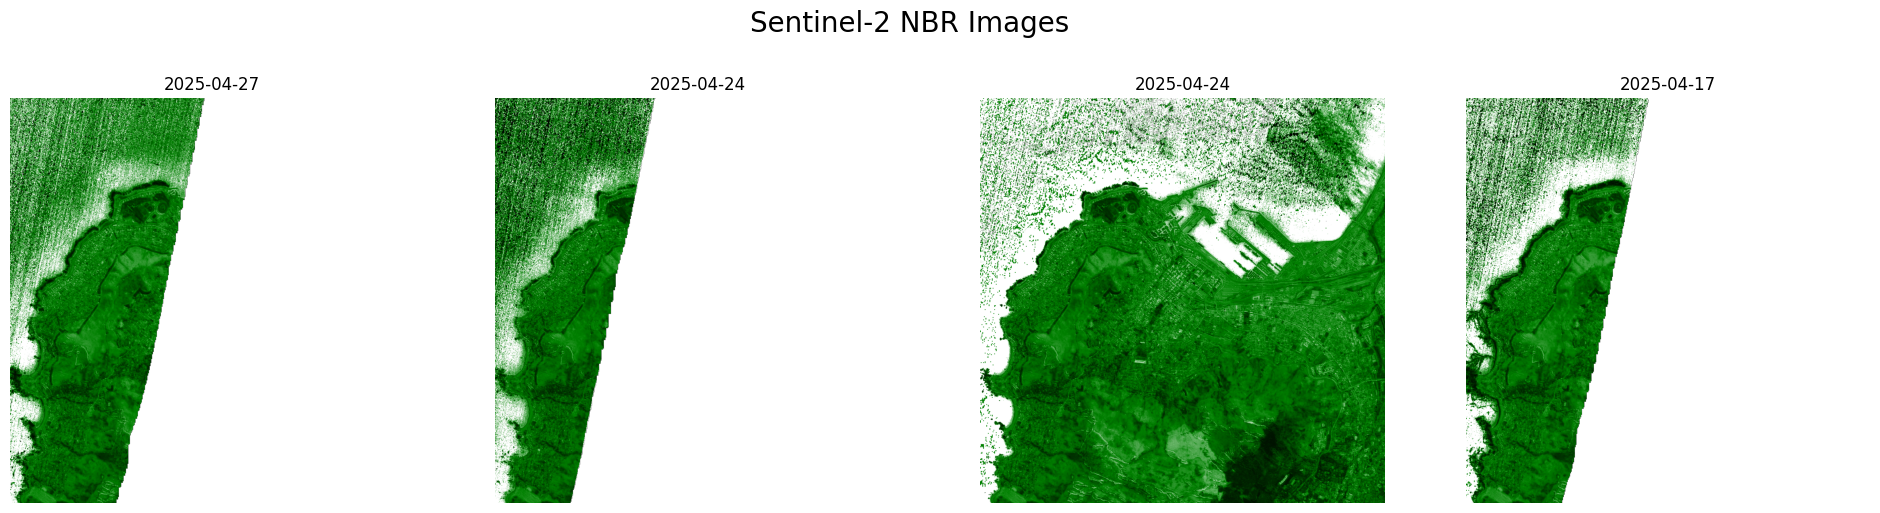

In [ ]:
fetch_and_display_images(
    lat=-33.9249,
    lon=18.4241,
    start_date='2025-04-10',
    end_date='2025-04-28',
    dataset='COPERNICUS/S2_SR_HARMONIZED',
    filmstrip=True,
    make_gif=False
)